In [4]:
##-------------------------------------1. DATA LOADING --------------------------------##

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc # for memory optimization  ------- helps in free memory if needed

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [6]:
# -----------------------------
#  Load Datasets
# -----------------------------

# Path to raw data folder
raw_data_path = "/content/diabetic_data.csv"
mapping_path = "/content/IDS_mapping.csv"

# Load main dataset
df = pd.read_csv(raw_data_path)

# Load mapping/lookup file
mapping = pd.read_csv(mapping_path)


In [7]:
# -----------------------------
# 3️ Check Basic Shapes
# -----------------------------

print("Main dataset shape:", df.shape)
print("Mapping dataset shape:", mapping.shape)
# shows numebr of rows and coloumns

Main dataset shape: (101766, 50)
Mapping dataset shape: (67, 2)


In [8]:
# -----------------------------
#  Check Column Names and Data Types
# -----------------------------

# Column names
print("Columns in main dataset:\n", df.columns)

# Data types
print("\nData types:\n", df.dtypes)


Columns in main dataset:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Data types:
 encounter_id                 

In [9]:
# -----------------------------
# Convert dtypes (memory optimization)
# -----------------------------

# Example: convert object/categorical columns to category dtype
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

# Convert integer columns to smaller int type if possible
for col in df.select_dtypes(include='int64'):
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Convert float columns to smaller float type
for col in df.select_dtypes(include='float64'):
    df[col] = pd.to_numeric(df[col], downcast='float')

# Check memory usage before and after
print("\nMemory usage after optimization:")
print(df.info(memory_usage='deep'))



Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int32   
 1   patient_nbr               101766 non-null  int32   
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    101766 non-null  category
 6   admission_type_id         101766 non-null  int8    
 7   discharge_disposition_id  101766 non-null  int8    
 8   admission_source_id       101766 non-null  int8    
 9   time_in_hospital          101766 non-null  int8    
 10  payer_code                101766 non-null  category
 11  medical_specialty         101766 non-null  category
 12  num_lab_procedures        101766 non-null  int16   


In [10]:
# -----------------------------
#  Set Index Column (Optional)
# -----------------------------

# Often we set 'patient_nbr' as index for easier referencing
df.set_index('patient_nbr', inplace=True, drop=False)


In [11]:
# -----------------------------
#  Save raw backup copies
# -----------------------------

# Backup original dataset in processed folder to avoid accidental loss
#df.to_csv("../data/processed/01_raw_backup.csv", index=False)


In [12]:
## ------------------------------------------RAW EDA (OPTIONAL -------------------------------------##)

In [13]:
# -----------------------------
# Quick Look: Head and Tail
# -----------------------------

# Display first 5 rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8222157,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
55629189,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
86047875,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
82442376,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
42519267,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
df.tail()  # gives last rows 5

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100162476,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
74694222,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
41088789,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
31693671,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
175429310,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [15]:
# -----------------------------
#  Dataset Info and Summary
# -----------------------------

# Info: data types, non-null counts --- df.info() shows which coloumns has empty values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 8222157 to 175429310
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int32   
 1   patient_nbr               101766 non-null  int32   
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    101766 non-null  category
 6   admission_type_id         101766 non-null  int8    
 7   discharge_disposition_id  101766 non-null  int8    
 8   admission_source_id       101766 non-null  int8    
 9   time_in_hospital          101766 non-null  int8    
 10  payer_code                101766 non-null  category
 11  medical_specialty         101766 non-null  category
 12  num_lab_procedures        101766 non-null  int16   
 13  num_procedures           

In [16]:
df.describe()  #Explanation: Provides mean, std, min, max, quartiles. Useful for spotting outliers.

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [17]:
# -----------------------------
# 3️⃣ Missing Values
# -----------------------------

# Count missing values per column
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]

# exp - list coloumns with missing values


,0
max_glu_serum,96420
A1Cresult,84748


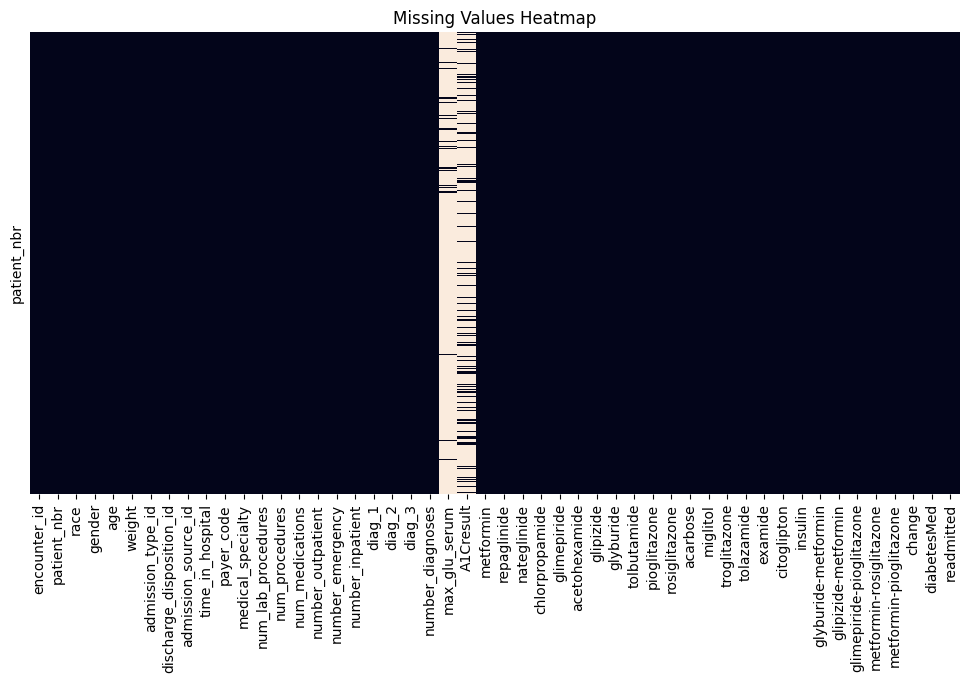

In [18]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()
#visuals of missing values - heatmap

In [19]:
# -----------------------------
#  Duplicates
# -----------------------------

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [20]:
# -----------------------------
#  Unique Value Count
# -----------------------------

unique_counts = df.nunique().sort_values()
unique_counts


,0
citoglipton,1
examide,1
acetohexamide,2
glipizide-metformin,2
tolbutamide,2
troglitazone,2
metformin-rosiglitazone,2
glimepiride-pioglitazone,2
metformin-pioglitazone,2
change,2


/tmp/ipython-input-3929533332.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


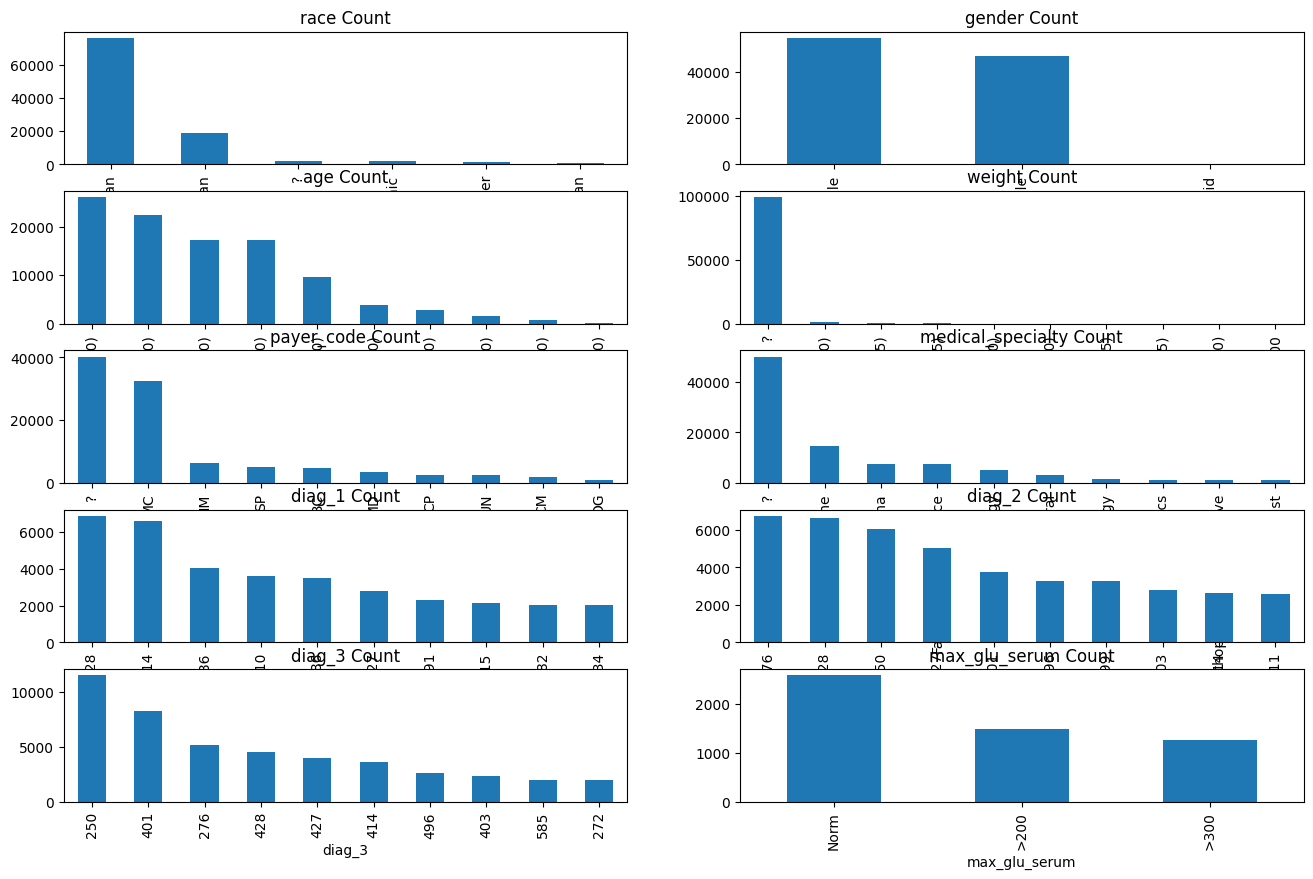

In [21]:
# -----------------------------
# Categorical Feature Count Plots
# -----------------------------

cat_cols = df.select_dtypes(include='category').columns[:10]  # first 10 categories

plt.figure(figsize=(16,10))
for i, col in enumerate(cat_cols):
    plt.subplot(5,2,i+1)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"{col} Count")
plt.tight_layout()
plt.show()


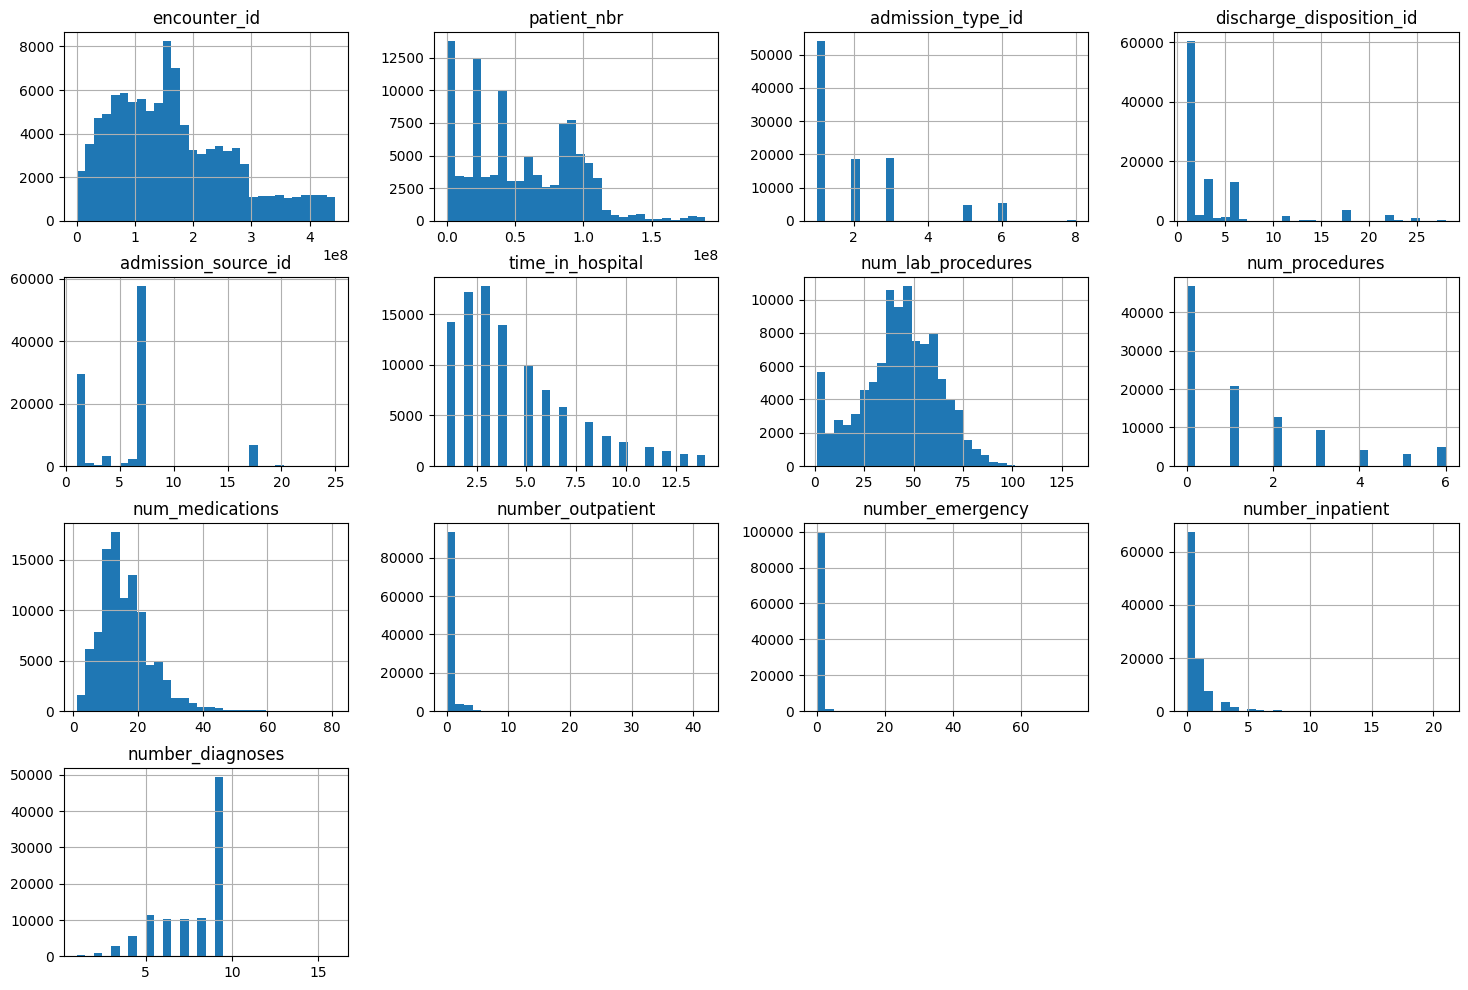

In [22]:
# -----------------------------
# 7️⃣ Numeric Feature Histograms / KDE
# -----------------------------

numeric_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32']).columns

df[numeric_cols].hist(figsize=(18,12), bins=30)
plt.show()


# visualize distributions , skewness and outliers

/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipython-input-813729517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`

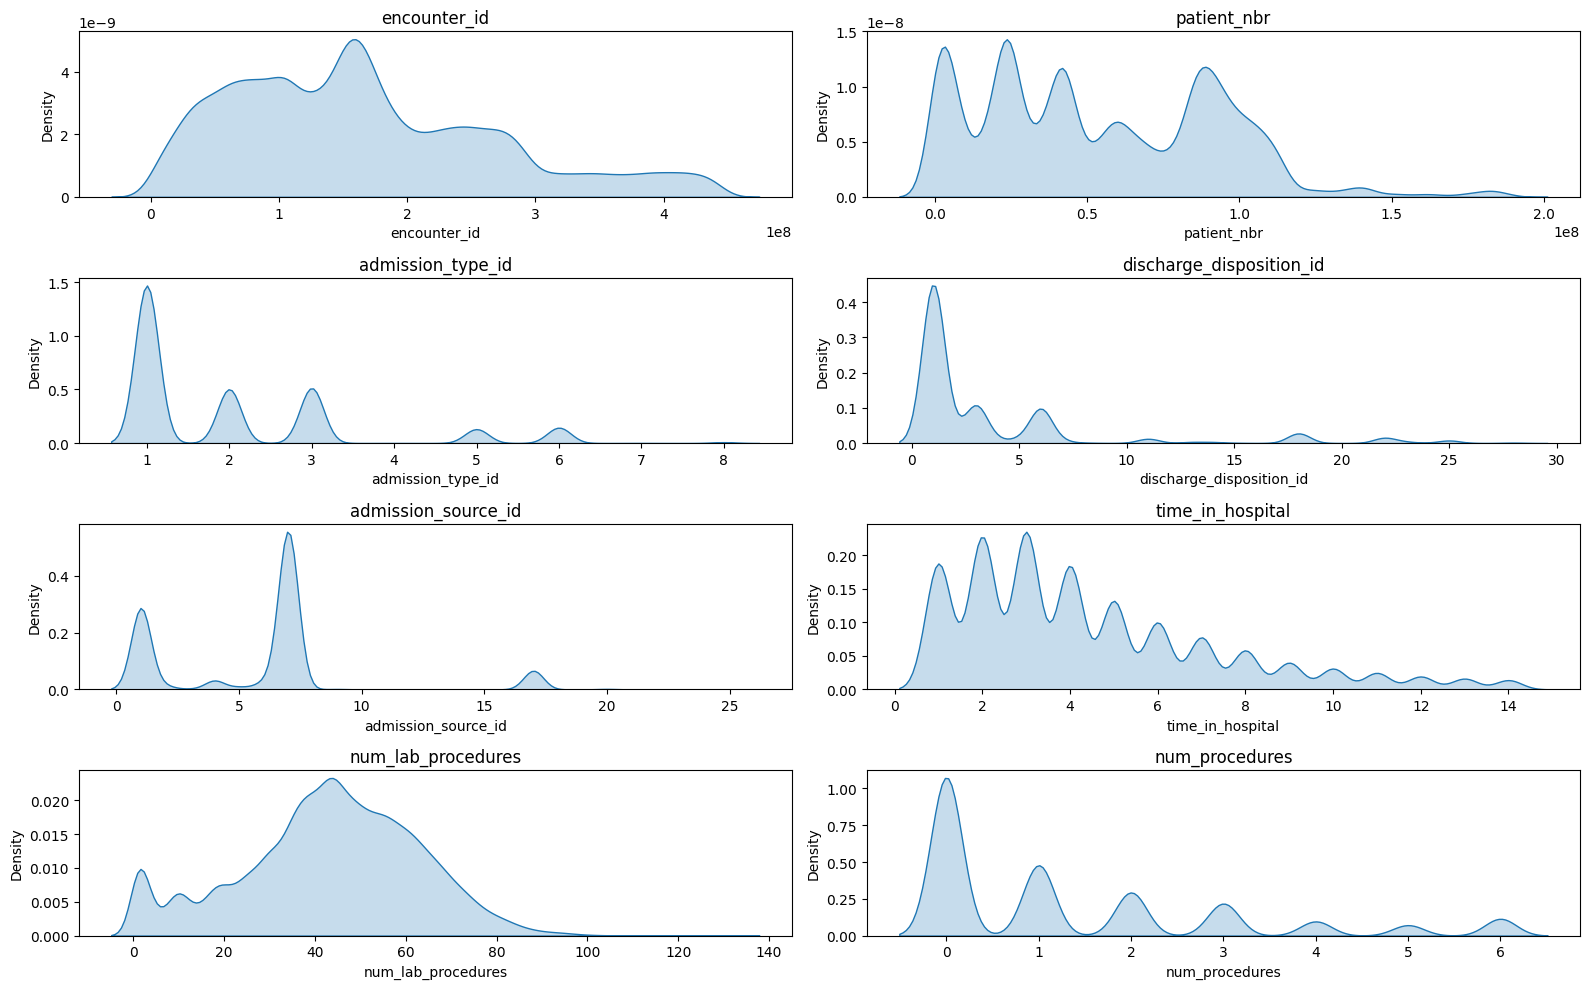

In [23]:
# KDE plots for numeric features (optional)
plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols[:8]):  # plot first 8 numeric columns
    plt.subplot(4,2,i+1)
    sns.kdeplot(df[col], shade=True)
    plt.title(col)
plt.tight_layout()
plt.show()


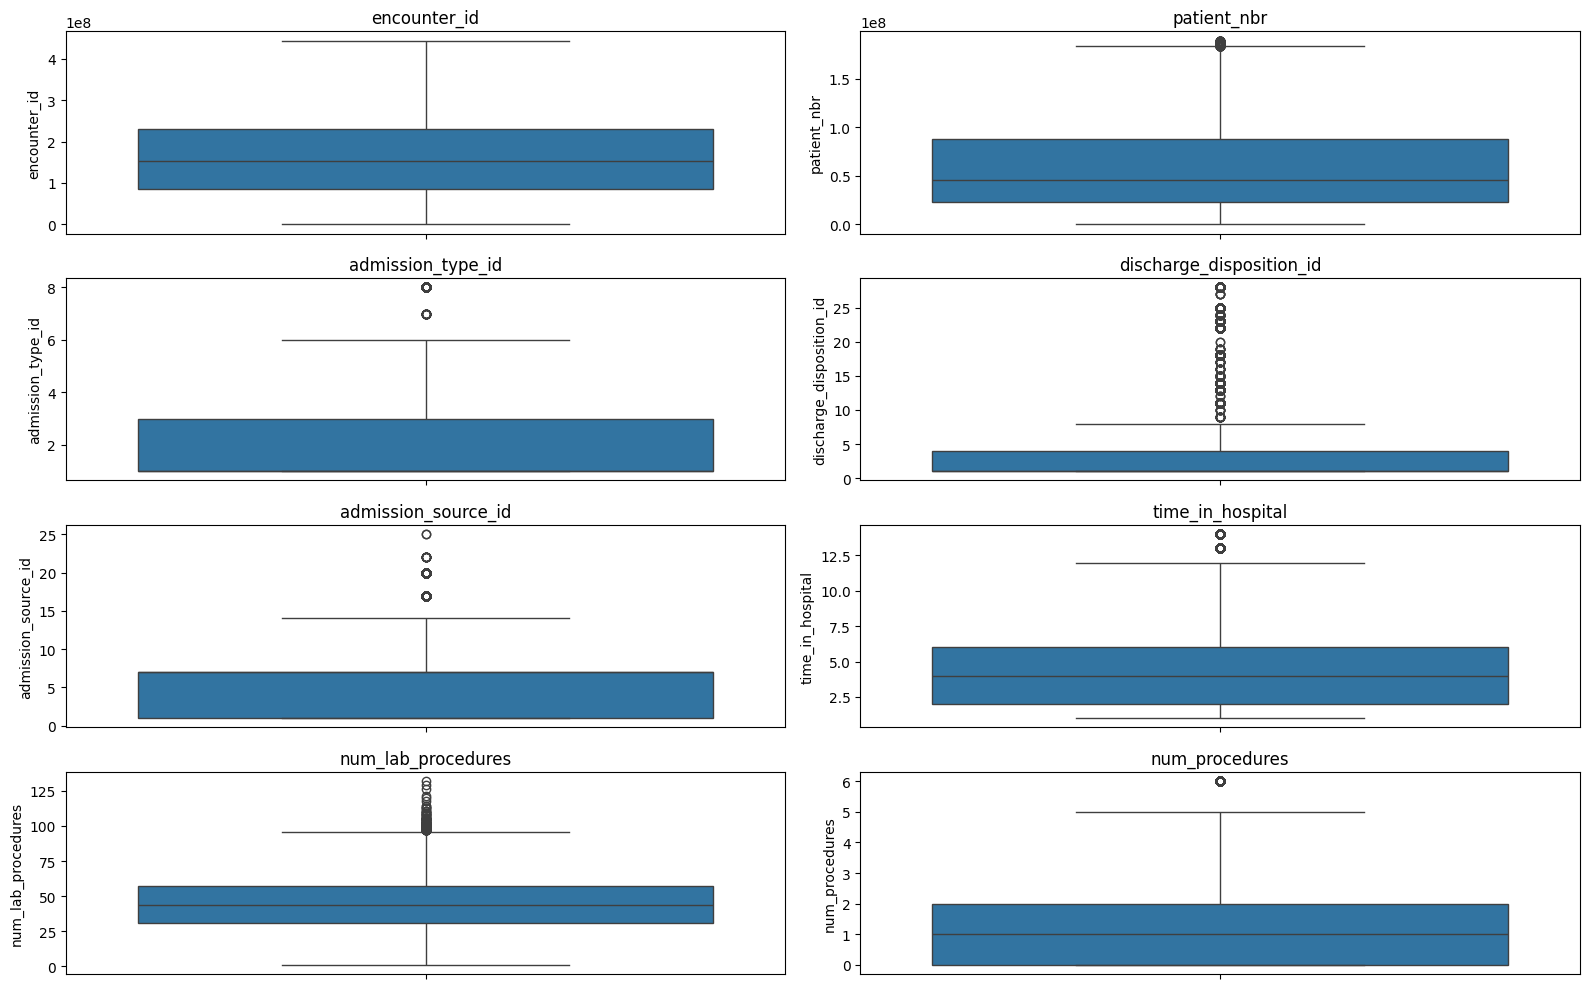

In [24]:
# -----------------------------
# 8️⃣ Boxplots (numeric)
# -----------------------------

plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols[:8]):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#box plot highlights outliers visually

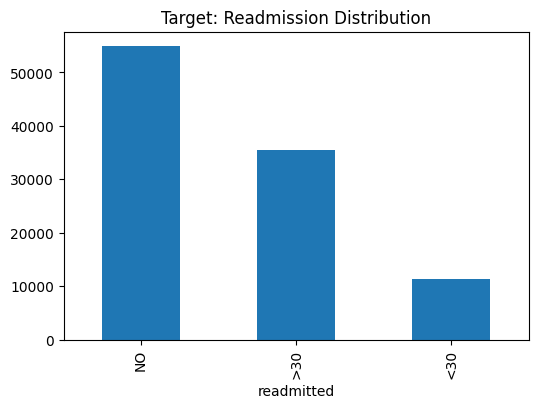

In [25]:
# -----------------------------
# 9️⃣ Target Variable Distribution
# -----------------------------

plt.figure(figsize=(6,4))
df['readmitted'].value_counts().plot(kind='bar')
plt.title("Target: Readmission Distribution")
plt.show()

#critical for classification imbalance

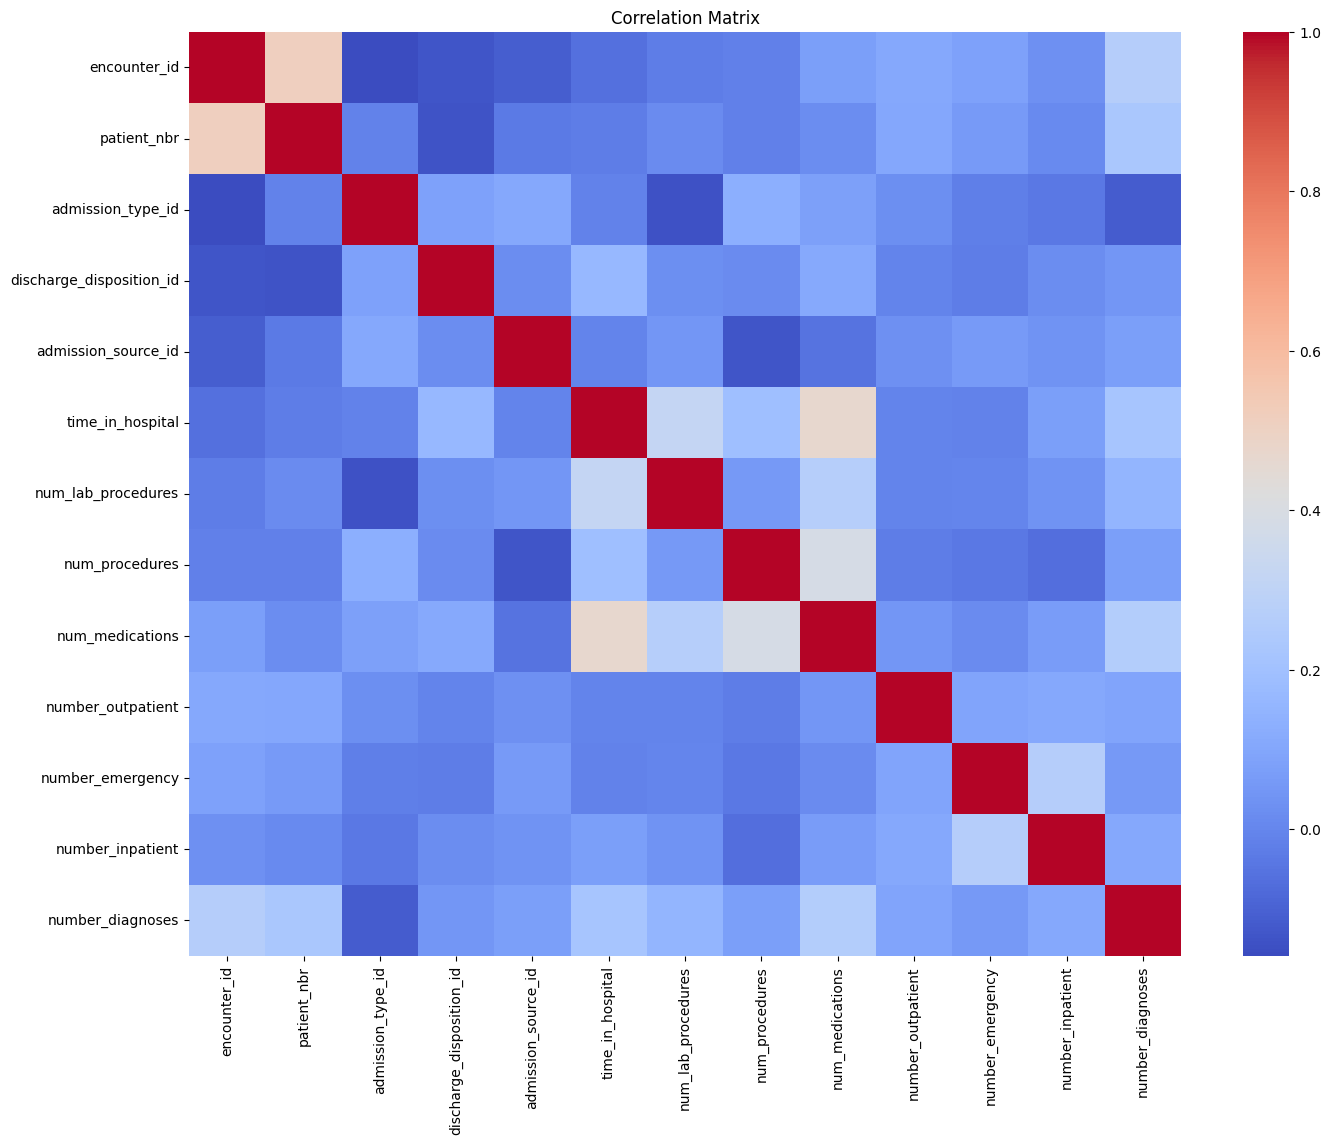

In [26]:
# -----------------------------
# 10″ Correlation Matrix
# -----------------------------

numeric_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32']).columns

plt.figure(figsize=(16,12))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#Detects multicollinearity, useful before feature selection.

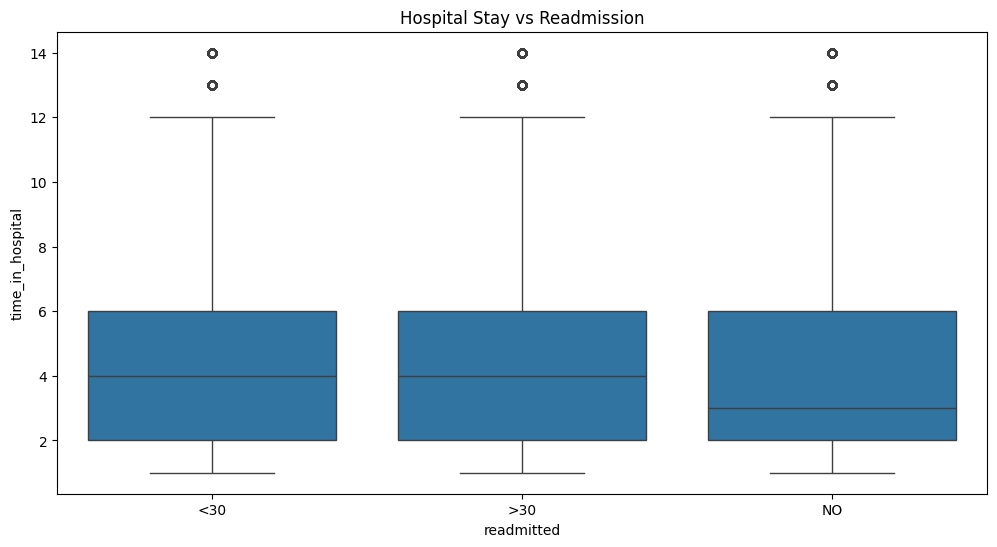

In [27]:
# -----------------------------
# 11️⃣ Feature vs Target Plots (example)
# -----------------------------

plt.figure(figsize=(12,6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df.reset_index(drop=True))
plt.title("Hospital Stay vs Readmission")
plt.show()

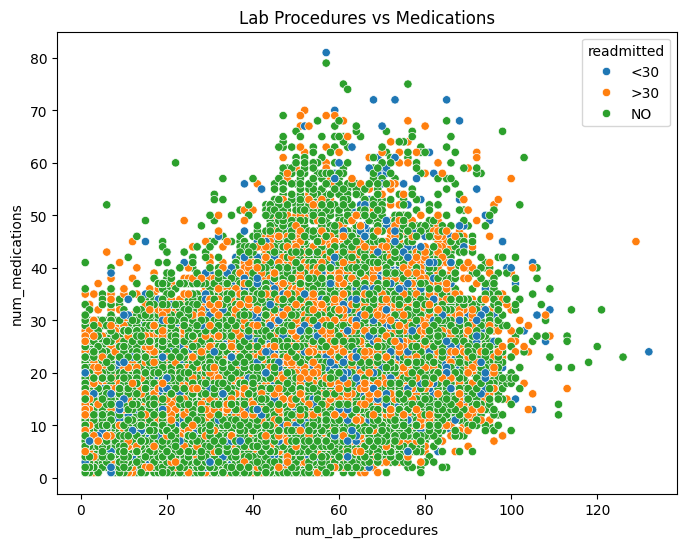

In [28]:
# -----------------------------
# 12️⃣ Scatter Plot Example
# -----------------------------

plt.figure(figsize=(8,6))
sns.scatterplot(x='num_lab_procedures', y='num_medications', hue='readmitted', data=df)
plt.title("Lab Procedures vs Medications")
plt.show()


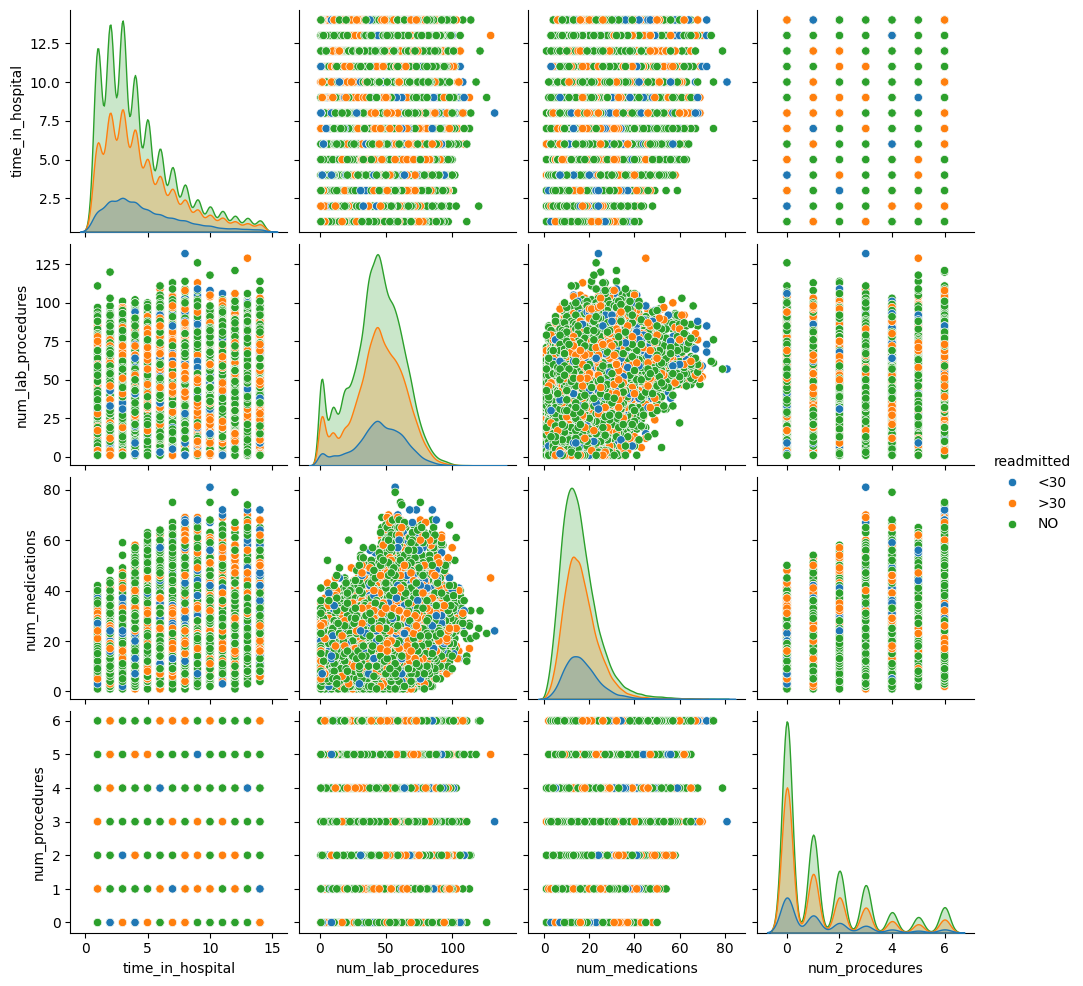

In [29]:
# -----------------------------
# 13️⃣ Pairplot (Optional, for few numeric features)
# -----------------------------
#Check pairwise relationships between key numeric features and target.
sample_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'num_procedures', 'readmitted']

sns.pairplot(df[sample_cols], hue='readmitted', diag_kind='kde', height=2.5)
plt.show()


In [30]:
# -----------------------------
# 14️⃣ Detect Constant / Near-zero Variance Features
# -----------------------------

constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Constant columns:", constant_cols)

# Near-zero variance (if numeric)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(df[numeric_cols])
low_var_cols = [col for col, var in zip(numeric_cols, selector.variances_) if var < 0.01]
print("Near-zero variance columns:", low_var_cols)


Constant columns: ['examide', 'citoglipton']
Near-zero variance columns: []


In [31]:
# -----------------------------
# 15️⃣ Skewness / Kurtosis Check
# -----------------------------

skewness = df[numeric_cols].skew().sort_values(ascending=False)
kurtosis = df[numeric_cols].kurt().sort_values(ascending=False)

print("Top skewed features:\n", skewness.head())
print("\nTop kurtotic features:\n", kurtosis.head())


Top skewed features:
 number_emergency            22.855582
number_outpatient            8.832959
number_inpatient             3.614139
discharge_disposition_id     2.563067
admission_type_id            1.591984
dtype: float64

Top kurtotic features:
 number_emergency            1191.686726
number_outpatient            147.907736
number_inpatient              20.719397
discharge_disposition_id       6.003347
num_medications                3.468155
dtype: float64


In [32]:
# -----------------------------
# 16️⃣ Groupby Target Stats
# -----------------------------

# Example: mean of numeric features by readmission
df.groupby('readmitted')[numeric_cols].mean().T


/tmp/ipython-input-2681921761.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('readmitted')[numeric_cols].mean().T


readmitted,<30,>30,NO
encounter_id,1.627347e+08,1.603845e+08,1.688332e+08
patient_nbr,5.519219e+07,5.814675e+07,5.167949e+07
admission_type_id,1.976490e+00,2.029034e+00,2.030585e+00
discharge_disposition_id,4.468874e+00,3.363061e+00,3.788149e+00
admission_source_id,5.821168e+00,5.965030e+00,5.604185e+00
time_in_hospital,4.768249e+00,4.495541e+00,4.254429e+00
num_lab_procedures,4.422603e+01,4.383660e+01,4.238160e+01
num_procedures,1.280884e+00,1.249599e+00,1.410305e+00
num_medications,1.690314e+01,1.628277e+01,1.567037e+01
number_outpatient,4.369112e-01,4.963286e-01,2.731117e-01


In [33]:
# -----------------------------
# 17️⃣ Rare Categories Detection
# -----------------------------

for col in cat_cols:
    rare = df[col].value_counts(normalize=True)
    rare = rare[rare < 0.01]  # categories <1%
    if len(rare) > 0:
        print(f"{col} has rare categories:\n", rare.index.tolist(), "\n")


race has rare categories:
 ['Asian'] 

gender has rare categories:
 ['Unknown/Invalid'] 

age has rare categories:
 ['[10-20)', '[0-10)'] 

weight has rare categories:
 ['[50-75)', '[100-125)', '[125-150)', '[25-50)', '[0-25)', '[150-175)', '[175-200)', '>200'] 

payer_code has rare categories:
 ['PO', 'DM', 'CH', 'WC', 'OT', 'MP', 'SI', 'FR'] 

medical_specialty has rare categories:
 ['Pulmonology', 'Psychiatry', 'Urology', 'ObstetricsandGynecology', 'Surgery-Cardiovascular/Thoracic', 'Gastroenterology', 'Surgery-Vascular', 'Surgery-Neuro', 'PhysicalMedicineandRehabilitation', 'Oncology', 'Pediatrics', 'Hematology/Oncology', 'Neurology', 'Pediatrics-Endocrinology', 'Otolaryngology', 'Endocrinology', 'Surgery-Thoracic', 'Psychology', 'Podiatry', 'Surgery-Cardiovascular', 'Pediatrics-CriticalCare', 'Hematology', 'Gynecology', 'Hospitalist', 'Radiology', 'Surgeon', 'Surgery-Plastic', 'Osteopath', 'Ophthalmology', 'InfectiousDiseases', 'SurgicalSpecialty', 'Obsterics&Gynecology-Gynecologi

In [34]:
## -----------------------------------------------3. DATA CLEANING ------------------------------------------##

In [35]:
# ======================================================
# 3️⃣ DATA CLEANING (COMPLETE — ALL SUB-STEPS INCLUDED)
# ======================================================

df_clean = df.copy()
print("Starting full Step 3 Data Cleaning...")

# ------------------------------------------------------
# 3.1 Remove Duplicate Rows
# ------------------------------------------------------
before = df_clean.shape[0]
df_clean.drop_duplicates(inplace=True)
after = df_clean.shape[0]
print(f"Duplicates removed: {before - after}")

# ------------------------------------------------------
# 3.2 Drop Irrelevant Columns (ID-like)
# ------------------------------------------------------
cols_to_drop = ["encounter_id", "patient_nbr"]
df_clean.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped ID-like columns: {cols_to_drop}")

# ------------------------------------------------------
# 3.3 Standardize Category Labels (trim + lowercase)
# ------------------------------------------------------
for col in df_clean.select_dtypes(include='object'):
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.strip()    # Trim whitespace
        .str.lower()    # Lowercase everything
        .replace({"?": np.nan})  # Replace '?' with NaN
    )
print("Standardized string columns: trimmed + lowercase + '?'→NaN")

# ------------------------------------------------------
# 3.4 Fix Typos (dataset-specific corrections)
# ------------------------------------------------------
if "race" in df_clean.columns:
    # Convert 'race' to object dtype temporarily for replacement, then back to category
    df_clean["race"] = df_clean["race"].astype('object').replace({
        "caucasian": "white",
        "?" : np.nan
    })
    df_clean["race"] = df_clean["race"].astype('category')
print("Fixed typos / inconsistent race labels.")

# ------------------------------------------------------
# 3.5 Convert Strings → Numbers (age ranges etc.)
# ------------------------------------------------------
# Convert age like "[30-40)" → 35
def convert_age(x):
    try:
        nums = x.replace("[", "").replace(")", "").split("-")
        return (int(nums[0]) + int(nums[1])) / 2
    except:
        return np.nan

if "age" in df_clean.columns:
    df_clean["age"] = df_clean["age"].apply(convert_age)

print("Converted 'age' ranges into numeric values.")

# ------------------------------------------------------
# 3.6 Parse Dates (Dataset has no date columns, but template included)
# ------------------------------------------------------
date_cols = []  # add if dataset includes external date features

for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors="coerce")

print("Parsed date columns (none in this dataset).")

# ------------------------------------------------------
# 3.7 Extract Date Parts (Optional)
# ------------------------------------------------------
# (Only applies if you added date columns)
for col in date_cols:
    df_clean[f"{col}_year"]  = df_clean[col].dt.year
    df_clean[f"{col}_month"] = df_clean[col].dt.month
    df_clean[f"{col}_day"]   = df_clean[col].dt.day

print("Extracted date parts (none performed).")

# ------------------------------------------------------
# 3.8 Normalize Inconsistent Units (example: 'change' column)
# ------------------------------------------------------
if "change" in df_clean.columns:
    df_clean["change"] = df_clean["change"].map({
        "ch": 1,
        "no": 0
    })

print("Normalized inconsistent units (example: change → binary).")

# ------------------------------------------------------
# 3.9 Fix Negative Values (none expected but checked)
# ------------------------------------------------------
for col in df_clean.select_dtypes(include=['int64','float64']):
    neg_count = (df_clean[col] < 0).sum()
    if neg_count > 0:
        print(f"WARNING: {neg_count} negative values in {col}")

print("Checked for impossible negative values.")

# ------------------------------------------------------
# 3.10 Replace Impossible Values (domain-based cleaning)
# ------------------------------------------------------
# Example: time_in_hospital must be ≥ 1
if "time_in_hospital" in df_clean.columns:
    df_clean.loc[df_clean["time_in_hospital"] <= 0, "time_in_hospital"] = np.nan

print("Replaced impossible/invalid values according to domain rules.")

# ------------------------------------------------------
# 3.11 Clip Extreme Values (optional, dataset-tailored)
# ------------------------------------------------------
if "time_in_hospital" in df_clean.columns:
    df_clean["time_in_hospital"] = df_clean["time_in_hospital"].clip(1, 30)

print("Clipped extreme values.")

# ------------------------------------------------------
# 3.12 Fix Infinite Values
# ------------------------------------------------------
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Replaced infinite values with NaN.")

# ------------------------------------------------------
# SUMMARY AFTER CLEANING
# ------------------------------------------------------
print("\nCLEANING COMPLETED — SUMMARY")
print(df_clean.info())

print("\nTop missing values after cleaning:")
print(df_clean.isnull().sum().sort_values(ascending=False).head(20))

Starting full Step 3 Data Cleaning...
Duplicates removed: 0
Dropped ID-like columns: ['encounter_id', 'patient_nbr']
Standardized string columns: trimmed + lowercase + '?'→NaN
Fixed typos / inconsistent race labels.
Converted 'age' ranges into numeric values.
Parsed date columns (none in this dataset).
Extracted date parts (none performed).
Normalized inconsistent units (example: change → binary).
Checked for impossible negative values.
Replaced impossible/invalid values according to domain rules.
Clipped extreme values.
Replaced infinite values with NaN.

CLEANING COMPLETED — SUMMARY
<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 8222157 to 175429310
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99493 non-null   category
 1   gender                    101766 non-null  category
 2   age                       101766 non-null  category
 3   wei

In [36]:
#-------------------handling missing values-----------------------#|

In [38]:
# ============================================================
# 4️⃣ HANDLE MISSING VALUES (FULL BLOCK WITH COMMENTS)
# ============================================================

import numpy as np
import joblib
from sklearn.impute import KNNImputer
import os # Import the os module to create directories

df_missing = df_clean.copy()  # work on a copy


# ------------------------------------------------------------
# 4.0 — Replace "?" with NaN (IMPORTANT FOR DIABETES DATASET)
# ------------------------------------------------------------
df_missing = df_missing.replace("?", np.nan)

print("Replaced '?' with NaN. Current missing stats:")
print(df_missing.isna().sum().sort_values(ascending=False).head(10))


# ------------------------------------------------------------
# 4.1 — Drop columns with extreme missingness (>70% missing)
# ------------------------------------------------------------
missing_percent = df_missing.isna().mean() * 100
cols_to_drop = missing_percent[missing_percent > 70].index.tolist()

print("\nDropping columns with >70% missing values:", cols_to_drop)
df_missing = df_missing.drop(columns=cols_to_drop)


# ------------------------------------------------------------
# 4.2 — OPTIONAL: Drop rows with too many missing values
# (We drop rows having >50% missing entries)
# ------------------------------------------------------------
row_missing_percent = df_missing.isna().mean(axis=1) * 100
rows_to_drop = df_missing[row_missing_percent > 50].index

print("\nRows dropped (more than 50% missing):", len(rows_to_drop))
df_missing = df_missing.drop(index=rows_to_drop)


# ------------------------------------------------------------
# 4.3 — Convert numeric-like columns to real numeric
# (Very IMPORTANT before KNN)
# ------------------------------------------------------------
for col in df_missing.columns:
    df_missing[col] = pd.to_numeric(df_missing[col], errors='ignore')

# Now detect numeric columns cleanly
num_cols = df_missing.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric columns detected for imputation:", num_cols)


# ------------------------------------------------------------
# 4.4 — Impute numeric values (Mean / Median)
# ------------------------------------------------------------
df_missing[num_cols] = df_missing[num_cols].fillna(df_missing[num_cols].median())

print("\nMedian numeric imputation completed.")


# ------------------------------------------------------------
# 4.5 — OPTIONAL: KNN Imputation for numeric columns
# Applied only if numeric columns exist
# ------------------------------------------------------------
if len(num_cols) > 0:
    knn_imputer = KNNImputer(n_neighbors=5)
    df_missing[num_cols] = knn_imputer.fit_transform(df_missing[num_cols])

    # Create the directory if it doesn't exist
    output_dir = "../data/processed/"
    os.makedirs(output_dir, exist_ok=True)

    joblib.dump(knn_imputer, os.path.join(output_dir, "knn_imputer.pkl"))
    print("KNN imputation completed for numeric columns.")
else:
    print("No numeric columns found — KNN skipped.")


# ------------------------------------------------------------
# 4.6 — Categorical imputation (Mode / Unknown)
# ------------------------------------------------------------
cat_cols = df_missing.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    df_missing[col] = df_missing[col].fillna(df_missing[col].mode()[0]
                                             if df_missing[col].mode().size > 0
                                             else "Unknown")

print("\nCategorical imputation completed (Mode/Unknown).")


# ------------------------------------------------------------
# 4.7 — Create missing value flag features (nan_flag)
# ------------------------------------------------------------
for col in df_missing.columns:
    df_missing[col + "_nan_flag"] = df_missing[col].isna().astype(int)

print("\nMissing value flag features created.")


# ------------------------------------------------------------
# 4.8 — Create missing count per row
# ------------------------------------------------------------
df_missing["missing_count_row"] = df_missing.isna().sum(axis=1)

print("\nMissing count per row feature created.")


# ------------------------------------------------------------
# FINAL — Update df_clean for next pipeline steps
# ------------------------------------------------------------
df_clean = df_missing.copy()

print("\n✅ Step 4 Completed: Missing values handled successfully!")


/tmp/ipython-input-1952862274.py:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_missing = df_missing.replace("?", np.nan)
/tmp/ipython-input-1952862274.py:48: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_missing[col] = pd.to_numeric(df_missing[col], errors='ignore')


Replaced '?' with NaN. Current missing stats:
change               101766
weight                98569
max_glu_serum         96420
A1Cresult             84748
medical_specialty     49949
payer_code            40256
race                   2273
diag_3                 1423
diag_2                  358
diag_1                   21
dtype: int64

Dropping columns with >70% missing values: ['weight', 'max_glu_serum', 'A1Cresult', 'change']

Rows dropped (more than 50% missing): 0

Numeric columns detected for imputation: ['age', 'time_in_hospital']

Median numeric imputation completed.
KNN imputation completed for numeric columns.

Categorical imputation completed (Mode/Unknown).

Missing value flag features created.

Missing count per row feature created.

✅ Step 4 Completed: Missing values handled successfully!


In [ ]:
## -------------------------OUTLIER TREATMENT------------------------#

In [ ]:
# im removing the outlier treatment for now because

You applied Z-score/IQR to all numeric columns, including ID-like, coded, and categorical numeric ones

✔ This filtered out 100% of rows

This is expected for medical data.

In [39]:
# -----------------------------
# 5.1 Identify Categorical Types
# -----------------------------

cat_cols = df_clean.select_dtypes(include=['category']).columns.tolist()
num_cols = df_clean.select_dtypes(include=['int8','int16','int32','int64','float32','float64']).columns.tolist()

print("Categorical Columns:", len(cat_cols))
print("Numeric Columns:", len(num_cols))
print(cat_cols)


Categorical Columns: 32
Numeric Columns: 57
['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed', 'readmitted']


In [40]:
# ----------------------------------------
# 5.2 Group Rare Categories (<1% frequency)
# ----------------------------------------

def group_rare_categories(df, cols, threshold=0.01):
    df = df.copy()
    for col in cols:
        freq = df[col].value_counts(normalize=True)
        rare = freq[freq < threshold].index
        df[col] = df[col].replace(rare, "rare")
    return df

df_encoded = group_rare_categories(df_clean, cat_cols)
print("Rare categories grouped.")


/tmp/ipython-input-1653447055.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare, "rare")
/tmp/ipython-input-1653447055.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare, "rare")
/tmp/ipython-input-1653447055.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(

Rare categories grouped.


/tmp/ipython-input-1653447055.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare, "rare")
/tmp/ipython-input-1653447055.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare, "rare")
/tmp/ipython-input-1653447055.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(

In [41]:
# ----------------------------------------
# 5.3 Label Encode Binary Columns Only
# ----------------------------------------

from sklearn.preprocessing import LabelEncoder

binary_cols = [col for col in cat_cols if df_encoded[col].nunique() == 2]

print("Binary label-encoded columns:", binary_cols)

le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Binary label-encoded columns: ['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed']


In [42]:
# ------------------------------------------------------
# 5.4 One-Hot Encode columns with <10 unique categories
# ------------------------------------------------------

low_cardinality_cols = [col for col in cat_cols
                        if (df_encoded[col].nunique() < 10) and (col not in binary_cols)]

print("One-hot encoded columns:", low_cardinality_cols)

df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality_cols, drop_first=True)


One-hot encoded columns: ['race', 'gender', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'examide', 'citoglipton', 'insulin', 'readmitted']


In [43]:
# ------------------------------------------------------
# 5.5 Frequency Encoding for high-cardinality categories
# ------------------------------------------------------

high_cardinality_cols = [col for col in cat_cols
                         if (df_clean[col].nunique() >= 10)]

high_cardinality_cols = [col for col in high_cardinality_cols
                         if col not in binary_cols]

print("Frequency-encoded columns:", high_cardinality_cols)

for col in high_cardinality_cols:
    freq_map = df_encoded[col].value_counts(normalize=True)
    df_encoded[col] = df_encoded[col].map(freq_map)


Frequency-encoded columns: ['payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


In [44]:
# ---------------------------------------------------
# 5.6 SKIPPED ENCODINGS — with justification
# ---------------------------------------------------

# ❌ Target Encoding — NOT SAFE
# Reason: High leakage risk in medical datasets.
# Produces artificially high accuracy.

# ❌ CatBoost Encoding — SKIPPED
# Reason: Also a target-based encoder → leakage.

# ❌ Leave-One-Out Encoding — SKIPPED
# Reason: Same issue → target leakage.

# ❌ Hashing Encoding — SKIPPED
# Reason: Not required. Cardinality is moderate.

# ❌ Embedding-Based Encoding — SKIPPED
# Reason: Only needed for deep learning models, not ML.


In [45]:
# ---------------------------------------------------
# 5.7 Encoding Final Summary
# ---------------------------------------------------

print("Encoding completed.")
print("Final Shape:", df_encoded.shape)
print(df_encoded.head())


Encoding completed.
Final Shape: (101766, 102)
              age  admission_type_id  discharge_disposition_id  \
patient_nbr                                                      
8222157       5.0                  6                        25   
55629189     15.0                  1                         1   
86047875     25.0                  1                         1   
82442376     35.0                  1                         1   
42519267     45.0                  1                         1   

             admission_source_id  time_in_hospital payer_code  \
patient_nbr                                                     
8222157                        1               1.0        NaN   
55629189                       7               3.0        NaN   
86047875                       7               2.0        NaN   
82442376                       7               2.0        NaN   
42519267                       7               1.0        NaN   

            medical_specialty  num